In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(<AxesSubplot:>,
 (-0.5, 255.5, 255.5, -0.5))

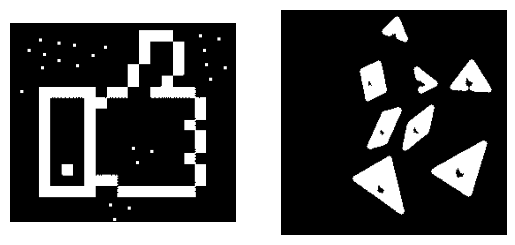

In [3]:
#read img
imgA = cv.imread('like.png')
imgB = cv.imread('shape.png')

grayA = cv.cvtColor(imgA, cv.COLOR_RGB2GRAY)
grayB = cv.cvtColor(imgB, cv.COLOR_RGB2GRAY)

retA, threshA = cv.threshold(grayA, 127, 255, cv.THRESH_BINARY)
retB, threshB = cv.threshold(grayB, 127, 255, cv.THRESH_BINARY)

# convert to binary
BinaryA = threshA.astype(int)/255
BinaryB = threshB.astype(int)/255

plt.subplot(1,2,1), plt.imshow(BinaryA, cmap='gray'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(BinaryB, cmap='gray'), plt.axis('off')

1. Develop and apply erosion and dilation to two images

In [4]:
# Develop Erosion

def Erosion(img, fil):
    (s,h) = fil.shape
    new = img.copy()
    (x,y) = img.shape
    p = round(s/2)+1
    padding = np.pad(img, [(p, p),(p, p)], mode='constant')
    for i in range(x):
        for j in range(y):
            img_cov = padding[i:i+s, j:j+s]
            if (img_cov != fil).all():
                new[i,j] = 0
            elif (img_cov == fil).all():
                new[i,j] = 1
            else:
                new[i,j] = 0
    return new

In [5]:
# Develop dilation

def Dilation(img, fil):
    (s,h) = fil.shape
    new = img.copy()
    (x,y) = img.shape
    p = round(s/2)+1
    padding = np.pad(img, [(p, p),(p, p)], mode='constant')
    for i in range(x):
        for j in range(y):
            img_cov = padding[i:i+s, j:j+h]
            if (img_cov != fil).all():
                new[i,j] = 0
            elif (img_cov == fil).all():
                new[i,j] = 1
            else:
                new[i,j] = 1
    return new

(<AxesSubplot:title={'center':'Dilation'}>,
 (-0.5, 255.5, 255.5, -0.5),
 Text(0.5, 1.0, 'Dilation'))

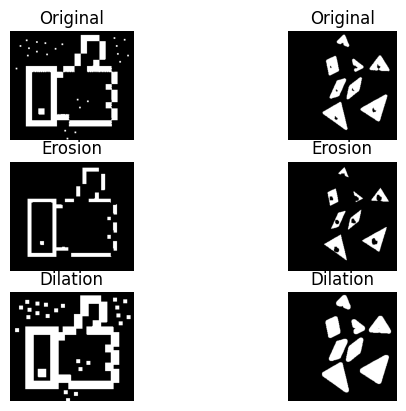

In [6]:
# original images
plt.subplot(3,2,1), plt.imshow(BinaryA, cmap='gray'), plt.axis('off'), plt.title('Original')
plt.subplot(3,2,2), plt.imshow(BinaryB, cmap='gray'), plt.axis('off'), plt.title('Original')

# Apply erosion

# fil = np.array([[1, 1, 1],
#                 [1, 1, 1],
#                 [1, 1, 1]])

fil = np.array([[1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1]])

# convert to binary
BinaryA = threshA.astype(int)/255
BinaryB = threshB.astype(int)/255

plt.subplot(3,2,3), plt.imshow(Erosion(BinaryA, fil), cmap='gray'), plt.axis('off'), plt.title('Erosion')
plt.subplot(3,2,4), plt.imshow(Erosion(BinaryB, fil), cmap='gray'), plt.axis('off'), plt.title('Erosion')

# Apply dilation

# convert to binary
BinaryA = threshA.astype(int)/255
BinaryB = threshB.astype(int)/255

plt.subplot(3,2,5), plt.imshow(Dilation(BinaryA, fil), cmap='gray'), plt.axis('off'), plt.title('Dilation')
plt.subplot(3,2,6), plt.imshow(Dilation(BinaryB, fil), cmap='gray'), plt.axis('off'), plt.title('Dilation')

2. Apply opening to an image

(<AxesSubplot:title={'center':'Opening'}>,
 (-0.5, 255.5, 255.5, -0.5),
 Text(0.5, 1.0, 'Opening'))

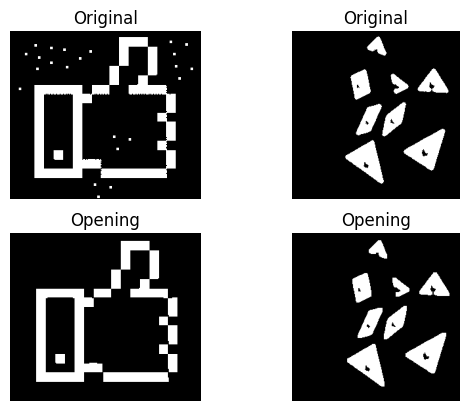

In [10]:
# original images
plt.subplot(2,2,1), plt.imshow(BinaryA, cmap='gray'), plt.axis('off'), plt.title('Original')
plt.subplot(2,2,2), plt.imshow(BinaryB, cmap='gray'), plt.axis('off'), plt.title('Original')

# Opening: Erosion -> Dilation

fil = np.array([[1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1]])

# fil = np.array([[1, 1, 1],
#                 [1, 1, 1],
#                 [1, 1, 1]])

BinaryA = threshA.astype(int)/255
BinaryB = threshB.astype(int)/255

# Apply Erosion
ErodeA = Erosion(BinaryA, fil)
ErodeB = Erosion(BinaryB, fil)

# Apply Dilation. Then, plot
plt.subplot(2,2,3), plt.imshow(Dilation(ErodeA, fil), cmap='gray'), plt.axis('off'), plt.title('Opening')
plt.subplot(2,2,4), plt.imshow(Dilation(ErodeB, fil), cmap='gray'), plt.axis('off'), plt.title('Opening')


3. Apply closing to an image

(<AxesSubplot:title={'center':'Closing'}>,
 (-0.5, 255.5, 255.5, -0.5),
 Text(0.5, 1.0, 'Closing'))

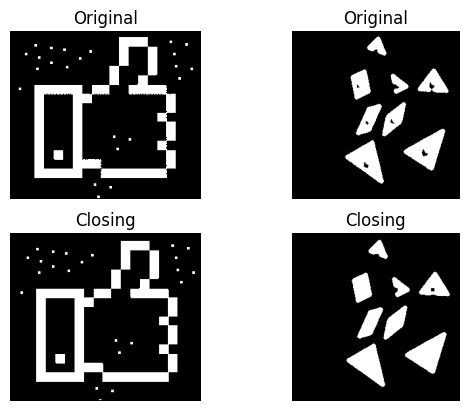

In [8]:
# original images
plt.subplot(2,2,1), plt.imshow(BinaryA, cmap='gray'), plt.axis('off'), plt.title('Original')
plt.subplot(2,2,2), plt.imshow(BinaryB, cmap='gray'), plt.axis('off'), plt.title('Original')

# Closing: Dilation -> Erosion

fil = np.array([[1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 1, 1, 1, 1]])

# fil = np.array([[1, 1, 1],
#                 [1, 1, 1],
#                 [1, 1, 1]])

BinaryA = threshA.astype(int)/255
BinaryB = threshB.astype(int)/255

# Apply Erosion
DilateA = Dilation(BinaryA, fil)
DilateB = Dilation(BinaryB, fil)

# Apply Dilation. Then, plot
plt.subplot(2,2,3), plt.imshow(Erosion(DilateA, fil), cmap='gray'), plt.axis('off'), plt.title('Closing')
plt.subplot(2,2,4), plt.imshow(Erosion(DilateB, fil), cmap='gray'), plt.axis('off'), plt.title('Closing')
